## K-Fold CV

Two types of parameters:
- parameters that model learnt from training
- parameters that we chose ourselves e.g. kernal parameter in SVM model (hyperparameters)
    - optimized via grid search
    - but need to optimize way to evaluate model
        - for now, split train and test and evaluate test
        - but not best, because of variane problem
        - if run model again and test on another test set, we might get different accuracy
    - so use k-fold CV

Example 10-Fold CV:
- train model and test then on all ten combinations of training and test sets
- much better idea of model performance
- average of diff accuracies of 10 evaluations and calculate stdev 
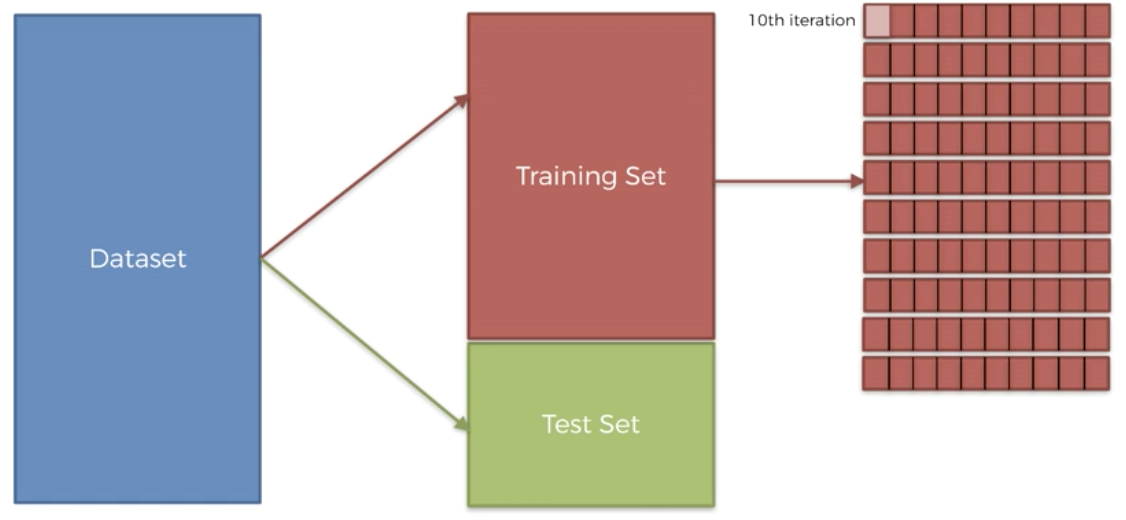

- look at avg accuracy and stdev and see:
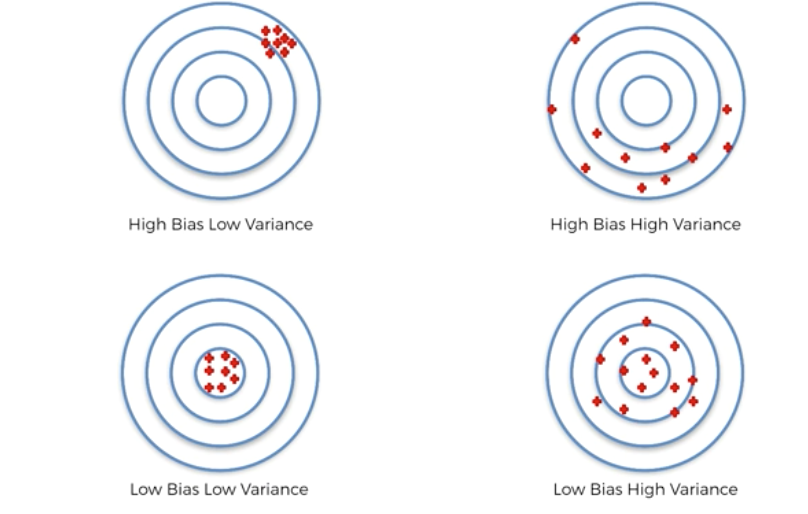

In [ ]:
from sklearn.model_selection import cross_val_score

#return 10 accuracy from each of 10-fold CV
accuracies = cross_val_score(estimator = classifier,/
                             X=X_train, y = y_train,
                            cv = 10, n_jobs = -1)

#get average
accuracies.mean()
#get stdev - avg of the differences between the different accuracies that we'll get when evaluating our model performance
#e.g. 90% mean and stdev 6% means most of time accuracy will be between 84%b and 96%
accuracies.std()

## Grid Search
- find optimal hyperparameters

Which model to choose
1. regression (continuous) vs. classification (categorical)
2. if no dependent variable - clustering
3. linear vs. non-linear
    - not as obvs e.g. linear or kernal svm?
    - use grid search

gamma - kernal coefficient for rbf, poly, sigmoid, if auto then 1/n_feature used (indicative of what value should generally be)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000],'kernal': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernal': ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]}
             ]
#choose best params based on one metric (scoring)
grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10, #10-fold cv
                          n_jobs = -1)
grid_search.fit(X_train, y_train)

In [ ]:
#get best accuracy score (avg of K-fold)
best_accuracy = grid_search.best_score_
#get optimal hyperparameters - return dictionary
best_parameters = grid_search.best_params_

Refine even more:
- if best gamma is 0.5 - remove 0.01 0.001, 0.0001 and choose 0.1 0.2 0.3 ... 0.9 and run again

## Random Search